In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/vikaskadam05/MyData/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 26 integer & 9 Object values

In [6]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns available in this dataset

In [7]:
#Checking value counts of all the featuress
for i in df.columns:
    print(df[i].value_counts(), '\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64 

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value in this dataset

There are some columns which I think may not contribute for the target prediction and need to remove from dataset i.e. 'EmployeeCount','EmployeeCount','StandardHours','Over18'.

In [9]:
df=df.drop(df[['EmployeeCount','EmployeeNumber','StandardHours','Over18']], axis=1)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 31)

Now after removing 4 columns I have 1470 rows and 31 columns available. 

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#converting categorical data into continue data
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)

In [16]:
for i in cat:
    df1=le.fit_transform(df[i])
    df[i]=df1  

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


Successfully converted Object datatype to continues data type by using Label Encoder 

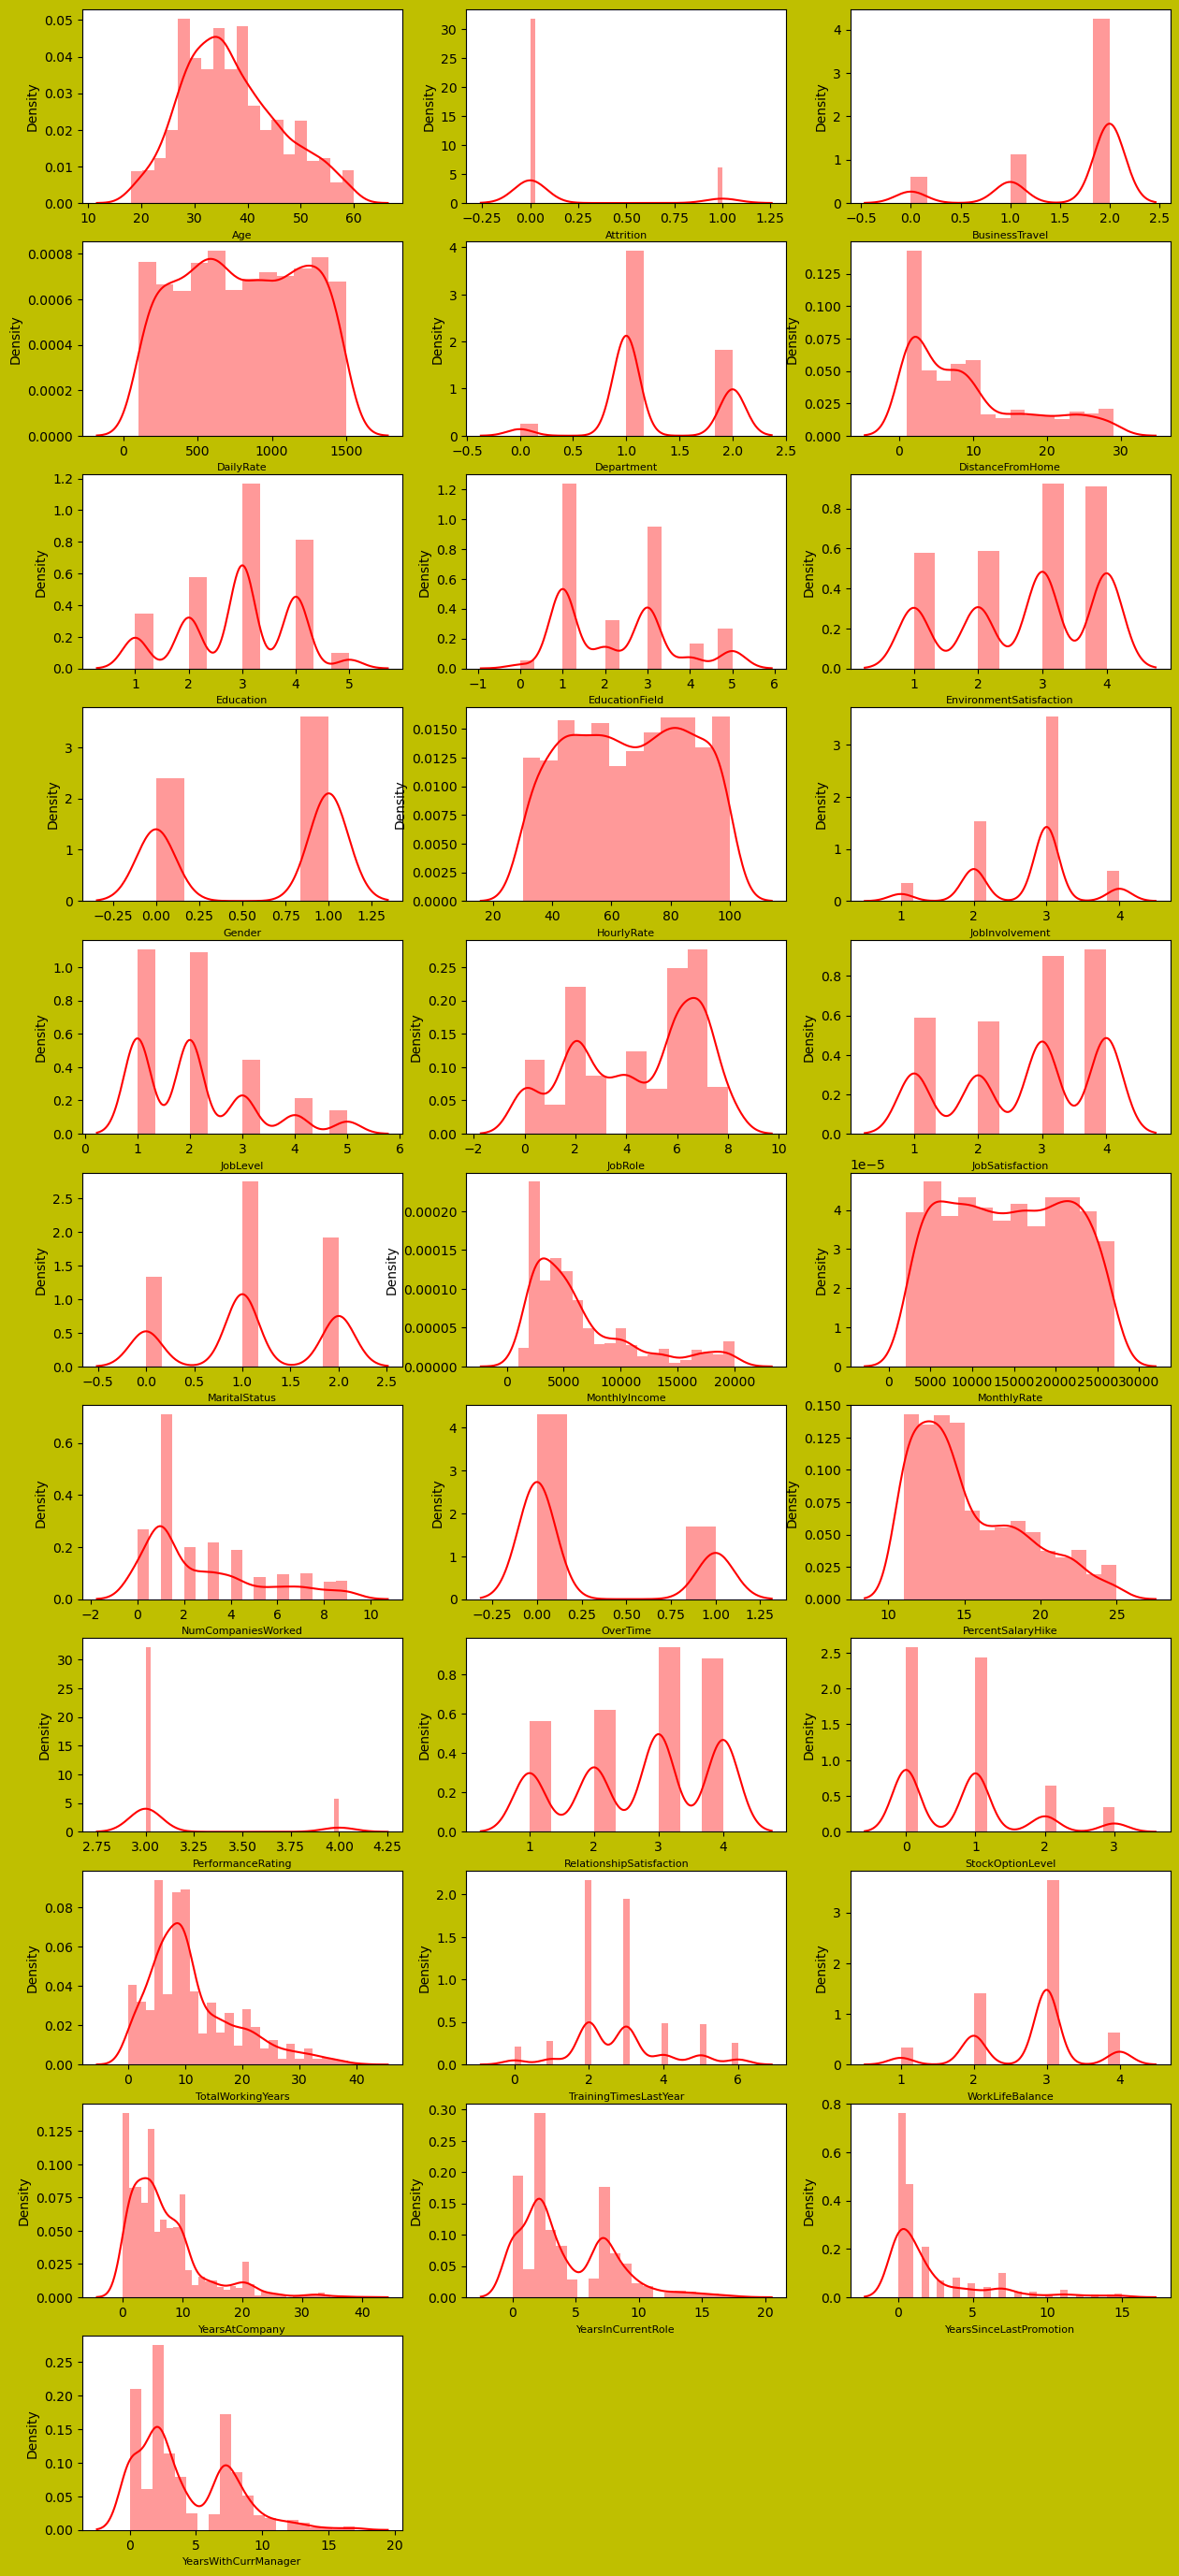

In [18]:
#Checking Outlier in dataset in this dataset through Distplot.
plt.figure(figsize=(15,35), facecolor='y')
plotnumber=1

for i in df:
    if plotnumber<=31:
        ax=plt.subplot(11,3,plotnumber)
        sns.distplot(df[i], color='r')
        plt.xlabel(i, fontsize=8)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()
    
    

I can see there are some outliers in some columns i.e. YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion & YearsWithCurrManager 

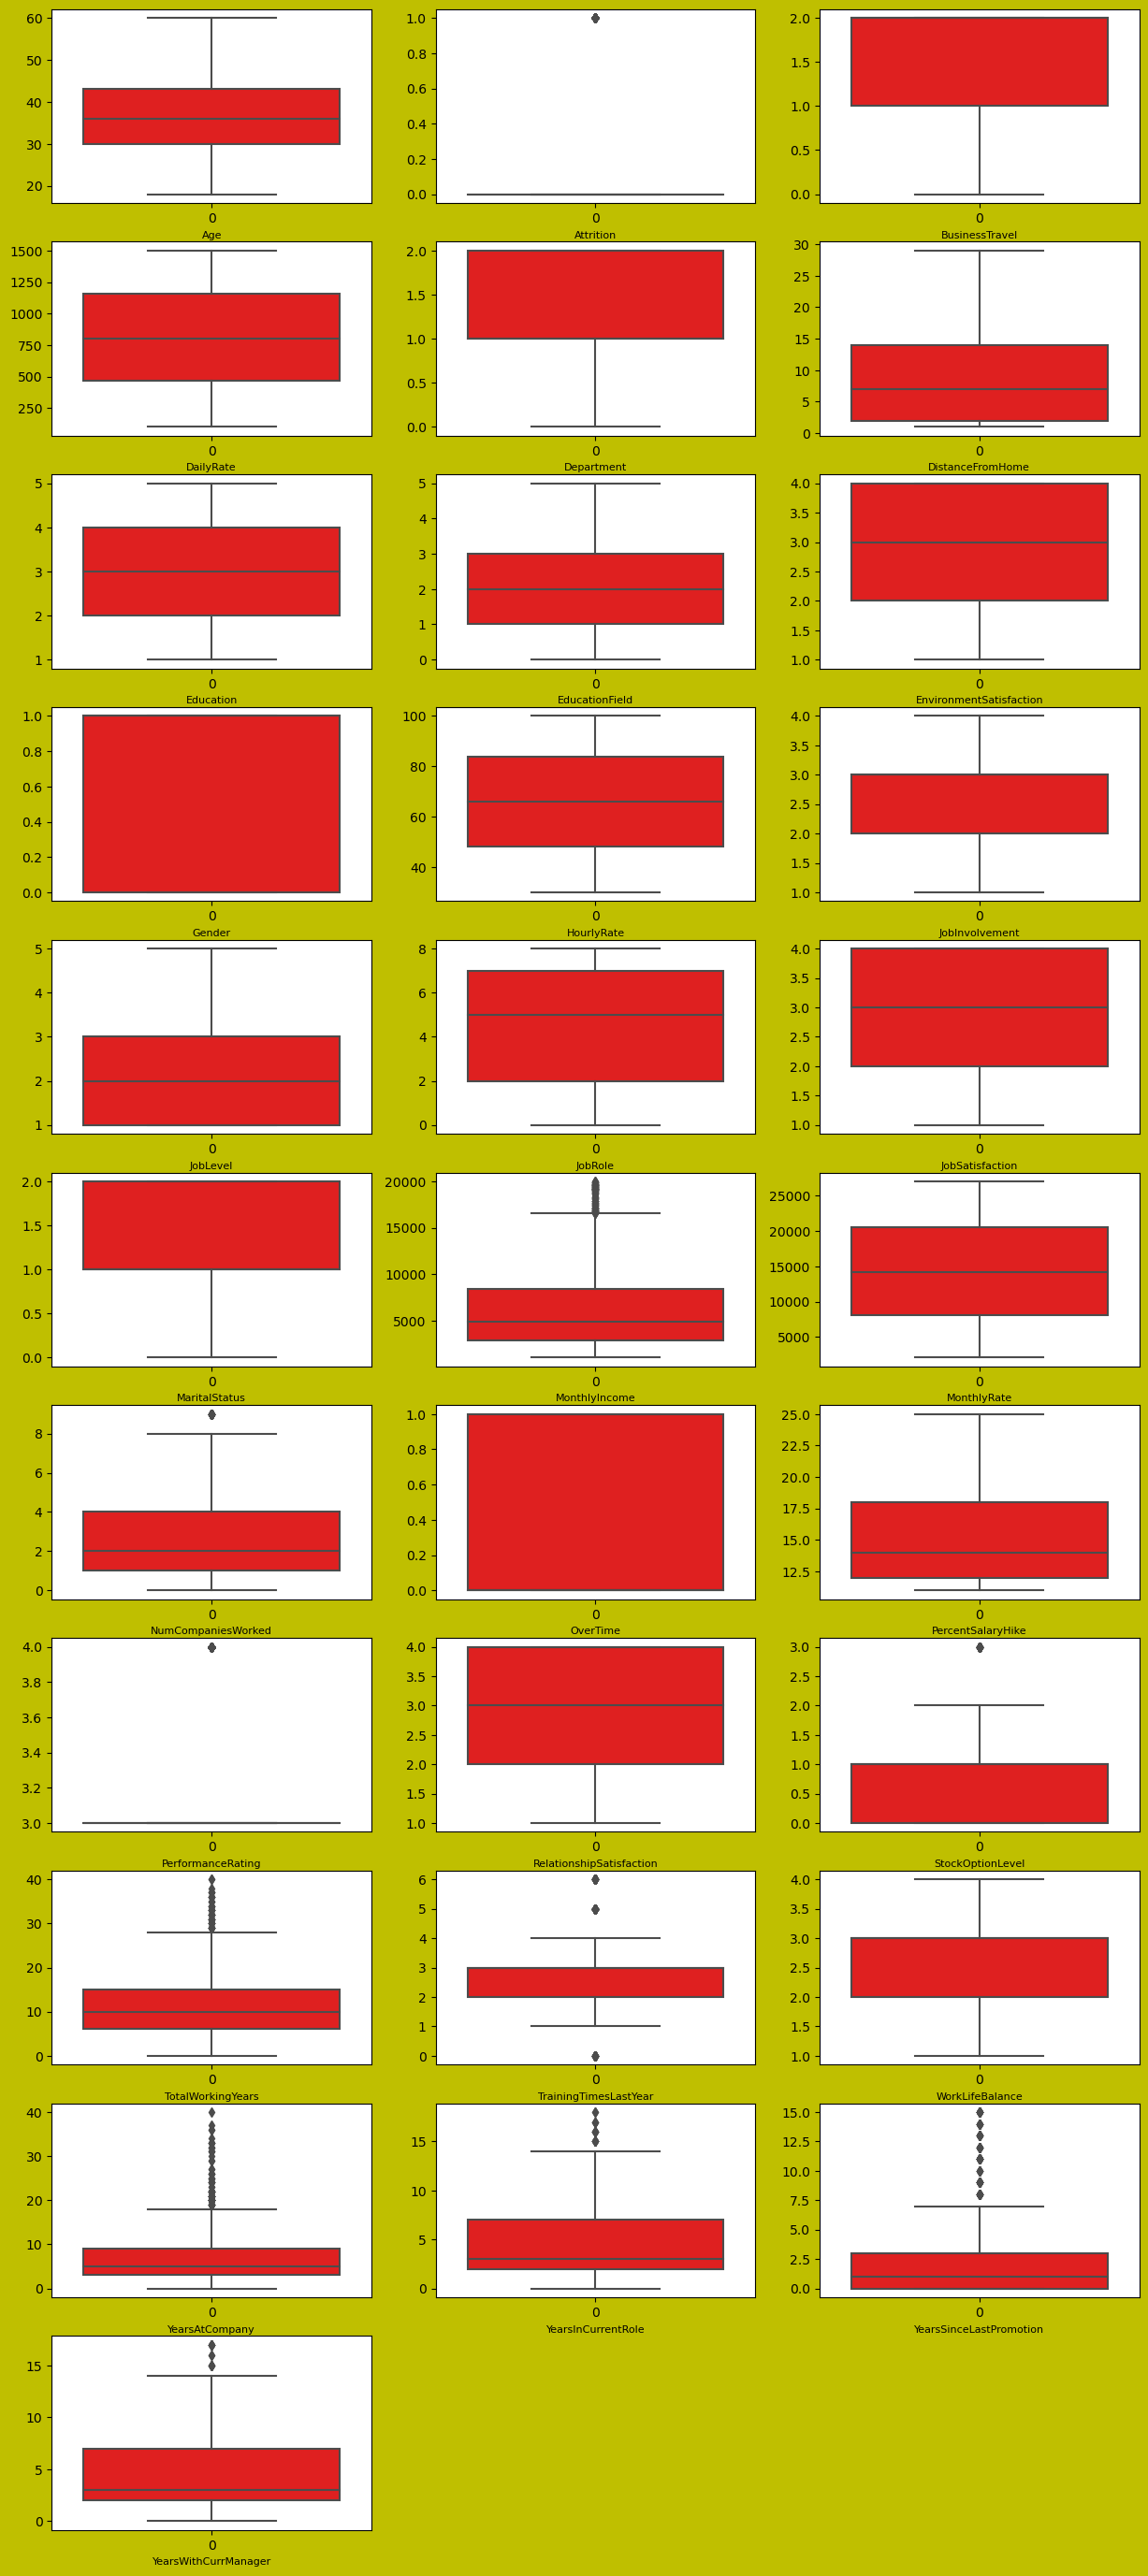

In [19]:
#Checking Outlier in dataset in this dataset through Boxplot.
plt.figure(figsize=(15,35), facecolor='y')
plotnumber=1

for i in df:
    if plotnumber<=31:
        ax=plt.subplot(11,3,plotnumber)
        sns.boxplot(df[i], color='r')
        plt.xlabel(i, fontsize=8)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In  boxplot I can see there are ouliers present in this dataset. I will try to remove these outliers by using zscore technique.

In [20]:
from scipy.stats import zscore

In [21]:
z_score=zscore(df[['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

In [22]:
abs_z_score=np.abs(z_score)

In [23]:
filter_entry=(abs_z_score<3).all(axis=1)

In [24]:
df=df[filter_entry]

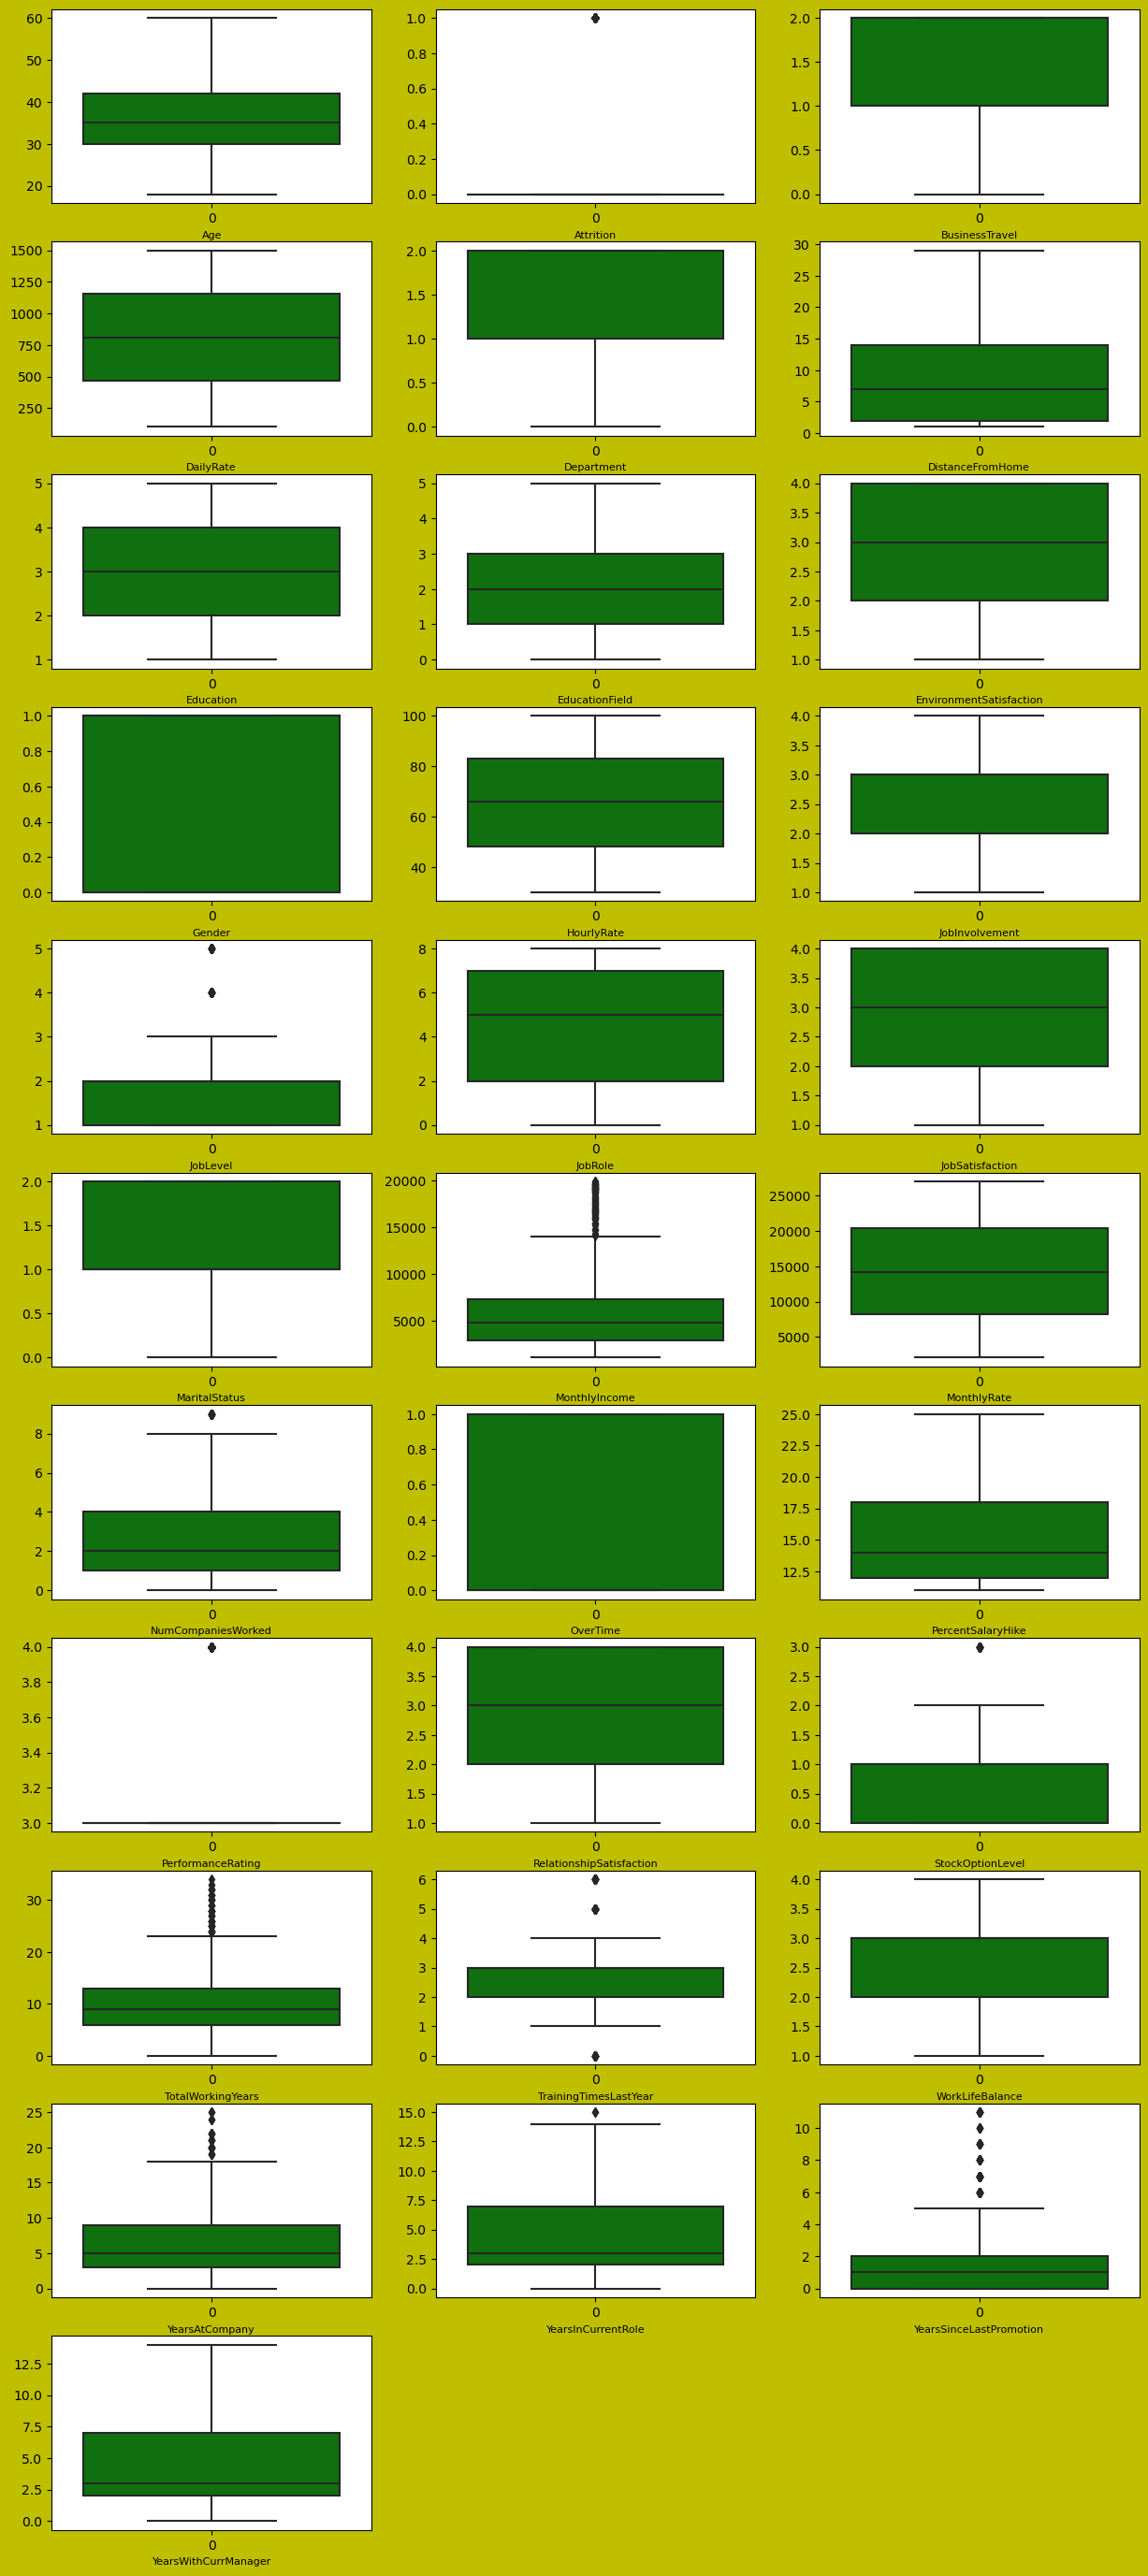

In [25]:
plt.figure(figsize=(15,35), facecolor='y')
plotnumber=1

for i in df:
    if plotnumber<=31:
        ax=plt.subplot(11,3,plotnumber)
        sns.boxplot(df[i], color='g')
        plt.xlabel(i, fontsize=8)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

I am able to remvoe some outliers form dataset.

In [27]:
#Checking if there is any multicollinearity problem in columns by using VIF technique.
x=df.drop('Attrition', axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
x_scaled=scaler.fit_transform(x)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.850568,Age
1,1.014106,BusinessTravel
2,1.029494,DailyRate
3,2.062034,Department
4,1.019457,DistanceFromHome
5,1.061558,Education
6,1.021559,EducationField
7,1.021370,EnvironmentSatisfaction
8,1.023993,Gender
9,1.022001,HourlyRate


There are two columns have high VIF value i.e. JobLevel & MonthlyIncome. So, I am removing these two columns.

In [32]:
df=df.drop(df[['JobLevel','MonthlyIncome']], axis=1)

In [34]:
df.shape

(1387, 29)

Now I have 29 columns for model building after removing unnecessary columns.

0    1158
1     229
Name: Attrition, dtype: int64


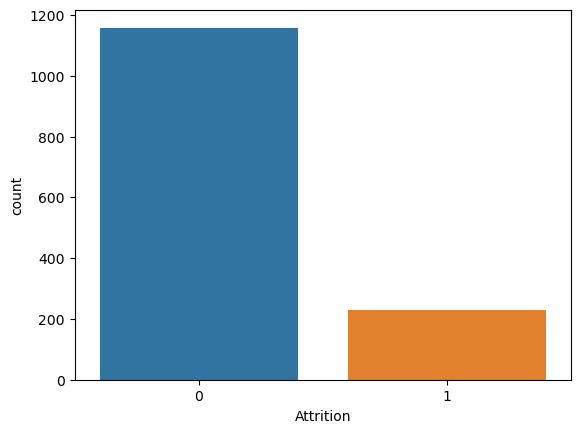

In [36]:
ax=sns.countplot(x='Attrition', data=df)
print(df['Attrition'].value_counts())

In [37]:
from collections import Counter

In [38]:
y=df.Attrition

In [41]:
Counter(df['Attrition'])

Counter({1: 229, 0: 1158})

There is imbalance data in 'Attrition' column. Need to use over sampling technique to balance the values in this column. I will use SMOTE technique to balance the data.

In [42]:
from imblearn.over_sampling import SMOTE

In [47]:
sm=SMOTE(random_state=99,k_neighbors=3, sampling_strategy=0.80)

In [51]:
x1, y1=sm.fit_resample(x,y)

In [52]:
print('Number of classes befor fit{}'.format(Counter(y)))
print('Number of classes after fit{}'.format(Counter(y1)))

Number of classes befor fitCounter({0: 1158, 1: 229})
Number of classes after fitCounter({0: 1158, 1: 926})


In [71]:
x1_scaled=scaler.fit_transform(x1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [91]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [95]:
mdl=[rfc,etc,lr,knn,dtc,gbc,abc,bc]

In [104]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x1_scaled, y1, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 91.55470249520154
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 92.32245681381957
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 83.17338451695457
Accuracy Score of Test Data: 82.72552783109404
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 89.63531669865642
Accuracy Score of Test Data: 82.91746641074856
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 78.3109404990403
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 94.6257197696737
Accuracy Score of Test Data: 89.63531669865642
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 88.41970569417786
Accuracy Score of Test Data: 85.98848368522073
Model Name:  AdaBoostClassifier()


Accuracy Score of Train Data: 99.36020473448497
Accuracy Score of Test Data: 88.09980806142035
Model 

Every Model has given good accuracy score. So, I will check the Cross Validation Score on every model.

In [106]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [107]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x1_scaled,y1)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.75539568 0.90647482 0.92086331 0.94724221 0.94951923]
Score Mean:  0.8958990499907765
diffrent Between Accuracy Score and CV score is : -0.016820355173118196


Model Name is : ExtraTreesClassifier()
Score:  [0.77218225 0.9088729  0.92805755 0.95683453 0.95192308]
Score Mean:  0.9035740638258624
diffrent Between Accuracy Score and CV score is : -0.028334140601294244


Model Name is : LogisticRegression()
Score:  [0.70743405 0.82733813 0.8441247  0.85611511 0.84375   ]
Score Mean:  0.8157523980815349
diffrent Between Accuracy Score and CV score is : 0.07484261151539406


Model Name is : KNeighborsClassifier()
Score:  [0.77218225 0.84892086 0.84172662 0.85851319 0.87740385]
Score Mean:  0.8397493543626637
diffrent Between Accuracy Score and CV score is : 0.054684426827355415


Model Name is : DecisionTreeClassifier()
Score:  [0.70983213 0.82014388 0.81055156 0.82733813 0.83894231]
Score Mean:  0.801361603025272
diffrent Between Accuracy 

Above score shows that best model is ExtraTreesClassifier. Now I will try to tune the model by using GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param={'criterion':['gini','entropy'],
      'random_state':[10,50],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55,150]}

In [111]:
gcv=GridSearchCV(etc,param,cv=5)

In [112]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 35],
                         'n_estimators': [10, 55, 150], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50]})

In [113]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 150,
 'n_jobs': -2,
 'random_state': 50}

In [114]:
final_model=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=150,n_jobs=-2, random_state=50)

In [118]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.9328214971209213

After tunning parameters I got 93% accuracy score.

In [119]:
import joblib
joblib.dump(final_model,'HR Empolyee attrition.pkl')

['HR Empolyee attrition.pkl']